In [1]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
from utils import *

#import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
colors = [
    "#fcf444",  # light yellow/pastel yellow
    "#84fc04",  # lime green / neon green
    "#84b4b4",  # blue-green
    "#340cfc",  # deep blue / electric blue
    "#046ccc",  # cyan blue
    "#c0fcfc",  # light cyan
    "#88fcfc",  # very light cyan / soft turquoise
    "#6cb4cc",  # light sky blue / light cerulean blue
    "#dc1cfc",  # bright magenta / electric purple
    "#1005bc",  # deep blue
    "#dedede",  # light gray
    "#fc0c34"   # gainsboro
]

lithology = [
    "Sandstone (Arenito)",
    "Sandstone/Shale (Arenito)",
    "Shale (Argilito)",
    "Marl (Marga)",
    "Dolomite (Dolomita)",
    "Limestone (Calcário)",  
    "Chalk (Giz)",
    "Halite (Halita)",
    "Anhydrite (Anidrita)",
    "Tuff (Tufo)",
    "Coal (Carvão)",
    "Basement (Substrato)" 
]

litologia_dict = {
    30000: 'Sandstone (Arenito)',
    65030: 'Sandstone/Shale (Arenito/Argilito)',
    65000: 'Shale (Argilito)',
    80000: 'Marl (Marga)',
    74000: 'Dolomite (Dolomita)',
    70000: 'Limestone (Calcário)',
    70032: 'Chalk (Giz)',
    88000: 'Halite (Halita)',
    86000: 'Anhydrite (Anidrita)',
    99000: 'Tuff (Tufo)',
    90000: 'Coal (Carvão)',
    93000: 'Basement (Substrato)'
}

In [3]:
dataset = pd.read_csv('Dados/train_dataset_proc.csv',index_col=0)
dataset.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,...,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_num,FORMATION_num,LITHOLOGY,RMED_log,RDEP_log
4238,15/9-13,1138.704,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,Utsira Fm.,19.322735,1.013309,1.091499,...,55.892757,0.765867,147.837677,30000,1.0,6,67,Sandstone (Arenito),0.005742,0.038023
4239,15/9-13,1138.856,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,Utsira Fm.,18.613674,1.088184,1.122706,...,60.929138,0.800262,142.382431,65000,1.0,6,67,Shale (Argilito),0.036703,0.050266
4240,15/9-13,1139.008,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,Utsira Fm.,18.212072,1.127155,1.148141,...,62.117264,0.765957,138.258331,65000,1.0,6,67,Shale (Argilito),0.051984,0.059995
4241,15/9-13,1139.160,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,Utsira Fm.,18.134182,1.141467,1.170984,...,61.010860,0.702521,139.198914,65000,1.0,6,67,Shale (Argilito),0.057463,0.068551
4242,15/9-13,1139.312,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,Utsira Fm.,18.033762,1.138007,1.184080,...,58.501236,0.639708,144.290085,65000,1.0,6,67,Shale (Argilito),0.056145,0.073381


In [4]:
blind = pd.read_csv('Dados/blind_dataset_proc.csv',index_col=0)
blind.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,...,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_num,FORMATION_num,LITHOLOGY,RMED_log,RDEP_log
39541,15/9-17,1012.637998,438592.28125,6478953.0,-990.611145,NORDLAND GP.,Utsira Fm.,16.618269,0.673416,0.802095,...,36.383289,0.536798,148.915009,65000,1.0,6,67,Shale (Argilito),-0.171716,-0.095774
39542,15/9-17,1012.789998,438592.28125,6478953.0,-990.763123,NORDLAND GP.,Utsira Fm.,16.544796,0.682334,0.784069,...,35.095161,0.537617,149.933502,65000,1.0,6,67,Shale (Argilito),-0.166003,-0.105646
39543,15/9-17,1012.941998,438592.28125,6478953.0,-990.915161,NORDLAND GP.,Utsira Fm.,16.460545,0.687906,0.775306,...,36.926651,0.548268,150.479660,30000,1.0,6,67,Sandstone (Arenito),-0.162471,-0.110527
39544,15/9-17,1013.093998,438592.28125,6478953.0,-991.067139,NORDLAND GP.,Utsira Fm.,16.420191,0.682793,0.773167,...,35.196995,0.526345,149.971573,30000,1.0,6,67,Sandstone (Arenito),-0.165711,-0.111727
39545,15/9-17,1013.245998,438592.28125,6478953.0,-991.219116,NORDLAND GP.,Utsira Fm.,16.608219,0.674900,0.774900,...,32.540020,0.501293,149.551514,30000,1.0,6,67,Sandstone (Arenito),-0.170760,-0.110754


In [5]:
#Verificando as colunas do dataset
dataset.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC',
       'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
       'GROUP_num', 'FORMATION_num', 'LITHOLOGY', 'RMED_log', 'RDEP_log'],
      dtype='object')

In [6]:
#Separando as variáveis de entrada e saída
cols = ['X_LOC', 'Y_LOC', 'Z_LOC','CALI', 'RMED', 'RDEP',
         'RHOB', 'GR', 'NPHI', 'DTC', 'FORCE_2020_LITHOFACIES_CONFIDENCE',
           'GROUP_num', 'RMED_log', 'RDEP_log']

X = dataset[cols]
y = dataset['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [7]:
#Separando conjunto de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
scaler.mean_,scaler.var_

(array([ 4.85901940e+05,  6.68011830e+06, -2.48356959e+03,  1.12569666e+01,
         4.89997775e+00,  5.83158741e+00,  2.35110618e+00,  7.55896376e+01,
         3.32089724e-01,  1.03435375e+02,  1.11305859e+00,  6.87747032e+00,
         3.41887666e-01,  3.08790801e-01]),
 array([1.26364537e+09, 1.87913761e+10, 7.51042882e+05, 8.18815852e+00,
        7.55420746e+02, 2.51882575e+03, 4.84464684e-02, 9.88386767e+02,
        1.62992737e-02, 6.54704077e+02, 1.28113523e-01, 1.39466458e+01,
        1.87951287e-01, 1.94540532e-01]))

### Experimentos com a regressão logística

In [10]:
lr = LogisticRegression()
lr.fit(scaler.transform(X_train),y_train)

c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
#Classification report substituindo as labels passadas pelo dicionário
print(classification_report(y_train,lr.predict(scaler.transform(X_train)),
                            target_names=litologia_dict.values()))

c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                    precision    recall  f1-score   support

               Sandstone (Arenito)       0.71      0.74      0.72     70857
Sandstone/Shale (Arenito/Argilito)       0.80      0.94      0.87    257980
                  Shale (Argilito)       0.41      0.14      0.20     56086
                      Marl (Marga)       0.62      0.59      0.60     23806
               Dolomite (Dolomita)       0.77      0.62      0.69      5568
              Limestone (Calcário)       0.20      0.01      0.02       593
                       Chalk (Giz)       0.47      0.17      0.25     12790
                   Halite (Halita)       0.81      0.74      0.77       236
              Anhydrite (Anidrita)       0.00      0.00      0.00        15
                       Tuff (Tufo)       0.74      0.51      0.60      2044
                     Coal (Carvão)       0.99      0.89      0.94        76
              Basement (Substrato)       0.72      0.88      0.79      3901

          

c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(classification_report(blind['FORCE_2020_LITHOFACIES_LITHOLOGY'],lr.predict(scaler.transform(blind[cols]))))

              precision    recall  f1-score   support

       30000       0.69      0.83      0.75     17295
       65000       0.75      0.94      0.83     52447
       65030       0.50      0.14      0.22     15905
       70000       0.70      0.70      0.70      6465
       74000       0.00      0.00      0.00        87
       80000       0.13      0.01      0.02      6674
       90000       0.67      0.71      0.69       533
       93000       0.00      0.00      0.00         0
       99000       0.68      1.00      0.81       923

    accuracy                           0.72    100329
   macro avg       0.46      0.48      0.45    100329
weighted avg       0.65      0.72      0.66    100329



c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Acer3\AppData\Local\Temp\ipykernel_14096\1248277359.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


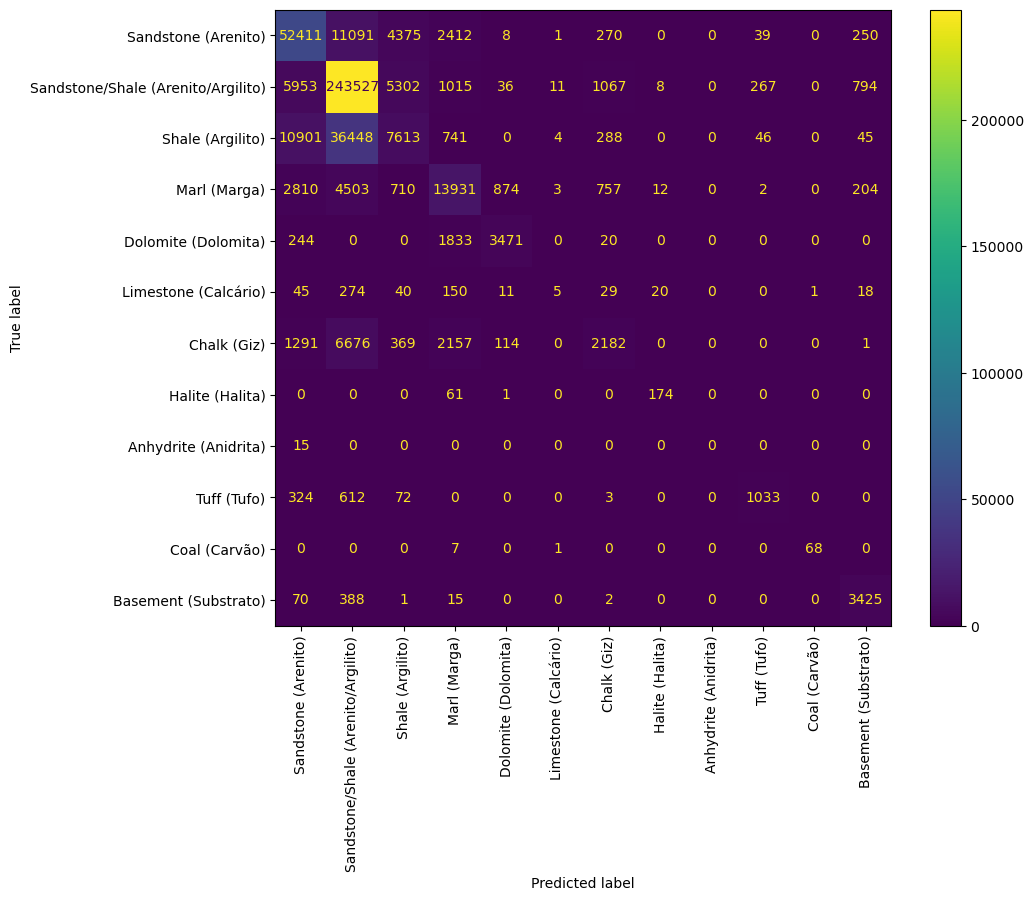

In [12]:
#Plotando a matriz de confusão

fig,axes = plt.subplots(figsize=(10,8))

disp = ConfusionMatrixDisplay(confusion_matrix(y_train,lr.predict(scaler.transform(X_train))),
                              display_labels=litologia_dict.values())

disp.plot(ax=axes)

axes.set_xticklabels(litologia_dict.values(),rotation=90)

fig.show()

In [13]:
#usando o map para transform as labels em strings
dataset['log_reg'] = list(map(litologia_dict.get,lr.predict(scaler.transform(X))))
blind['log_reg'] = list(map(litologia_dict.get,lr.predict(scaler.transform(blind[cols]))))

(<Figure size 1100x1200 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object))

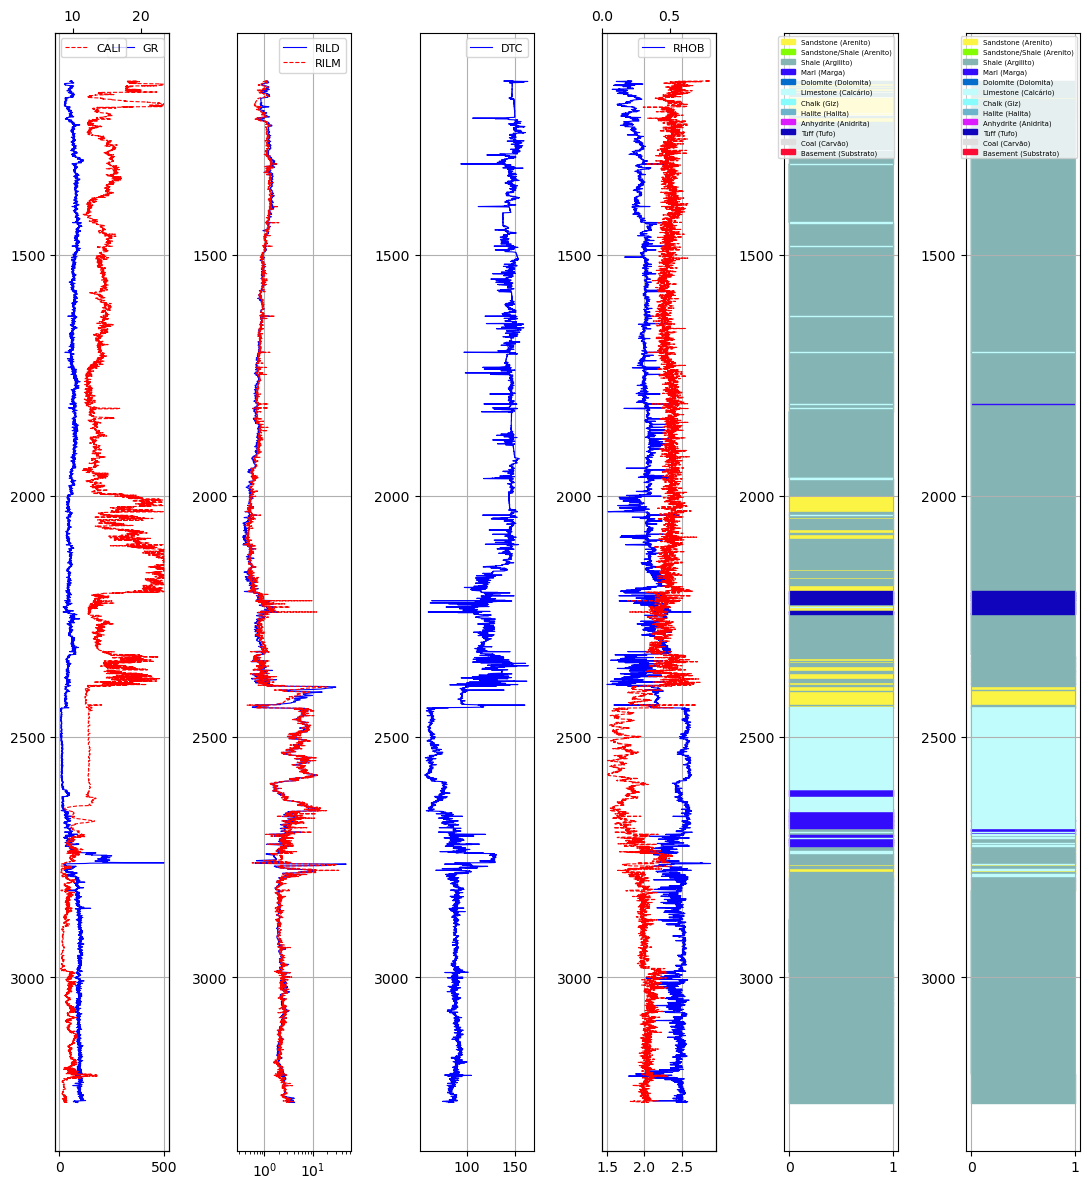

In [14]:
plot_well_logs_comparison(dataset, well='15/9-13',
               lithology_col='LITHOLOGY',predicted_col='log_reg',
               colors=colors,lithology=lithology,dz=100)

In [15]:
@interact(well=blind.WELL.unique())
def update_well_plot(well):
    plot_well_logs_comparison(blind, well=well,lithology_col='LITHOLOGY',predicted_col='log_reg',colors=colors,lithology=lithology,dz=100)

interactive(children=(Dropdown(description='well', options=('15/9-17', '25/2-7', '25/4-5', '31/2-1', '31/2-19 …

### Aplicando o KNN

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scaler.transform(X_train),y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
y_knn_pred = knn.predict(scaler.transform(X_train))
y_knn_pred_test = knn.predict(scaler.transform(X_train))

In [28]:
#Classification report substituindo as labels passadas pelo dicionário
print(classification_report(y_train,y_knn_pred,
                            target_names=litologia_dict.values()))

                                    precision    recall  f1-score   support

               Sandstone (Arenito)       0.93      0.94      0.93     70857
Sandstone/Shale (Arenito/Argilito)       0.96      0.98      0.97    257980
                  Shale (Argilito)       0.89      0.87      0.88     56086
                      Marl (Marga)       0.93      0.81      0.87     23806
               Dolomite (Dolomita)       0.95      0.95      0.95      5568
              Limestone (Calcário)       0.85      0.56      0.67       593
                       Chalk (Giz)       0.92      0.90      0.91     12790
                   Halite (Halita)       0.88      0.92      0.90       236
              Anhydrite (Anidrita)       0.88      0.93      0.90        15
                       Tuff (Tufo)       0.92      0.75      0.83      2044
                     Coal (Carvão)       1.00      0.96      0.98        76
              Basement (Substrato)       0.94      0.97      0.96      3901

          

In [ ]:
#Classification report substituindo as labels passadas pelo dicionário
print(classification_report(y_test,y_knn_pred_test,
                            target_names=litologia_dict.values()))

C:\Users\Acer3\AppData\Local\Temp\ipykernel_14096\3368134668.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


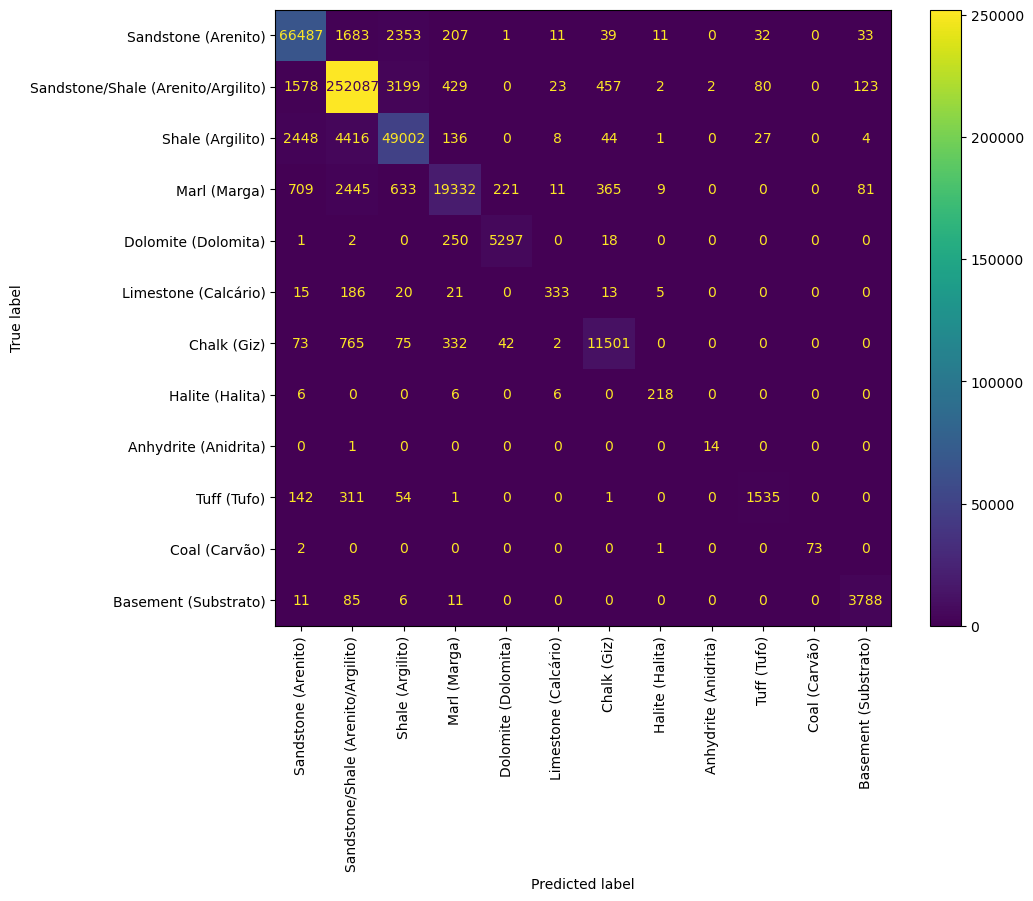

In [29]:
#Plotando a matriz de confusão

fig,axes = plt.subplots(figsize=(10,8))

disp = ConfusionMatrixDisplay(confusion_matrix(y_train,y_knn_pred),
                              display_labels=litologia_dict.values())

disp.plot(ax=axes)

axes.set_xticklabels(litologia_dict.values(),rotation=90)

fig.show()

In [30]:
y_blind = knn.predict(scaler.transform(blind[cols]))

In [67]:
keys_blind = sorted(np.unique(y_blind))
dic_blind = {chave: litologia_dict[chave] for chave in keys_blind}

In [59]:
litologia_dict

{30000: 'Sandstone (Arenito)',
 65030: 'Sandstone/Shale (Arenito/Argilito)',
 65000: 'Shale (Argilito)',
 80000: 'Marl (Marga)',
 74000: 'Dolomite (Dolomita)',
 70000: 'Limestone (Calcário)',
 70032: 'Chalk (Giz)',
 88000: 'Halite (Halita)',
 86000: 'Anhydrite (Anidrita)',
 99000: 'Tuff (Tufo)',
 90000: 'Coal (Carvão)',
 93000: 'Basement (Substrato)'}

In [68]:
#Classification report substituindo as labels passadas pelo dicionário
print(classification_report(blind['FORCE_2020_LITHOFACIES_LITHOLOGY'],y_blind,target_names=list(dic_blind.values())))

                                    precision    recall  f1-score   support

               Sandstone (Arenito)       0.60      0.70      0.64     17295
                  Shale (Argilito)       0.76      0.80      0.78     52447
Sandstone/Shale (Arenito/Argilito)       0.37      0.26      0.31     15905
              Limestone (Calcário)       0.60      0.59      0.59      6465
                       Chalk (Giz)       0.00      0.00      0.00         0
               Dolomite (Dolomita)       0.00      0.00      0.00        87
                      Marl (Marga)       0.56      0.46      0.50      6674
              Anhydrite (Anidrita)       0.00      0.00      0.00         0
                     Coal (Carvão)       0.65      0.67      0.66       533
                       Tuff (Tufo)       0.68      0.85      0.76       923

                          accuracy                           0.66    100329
                         macro avg       0.42      0.43      0.42    100329
          

c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Acer3\AppData\Local\Temp\ipykernel_14096\3156860936.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


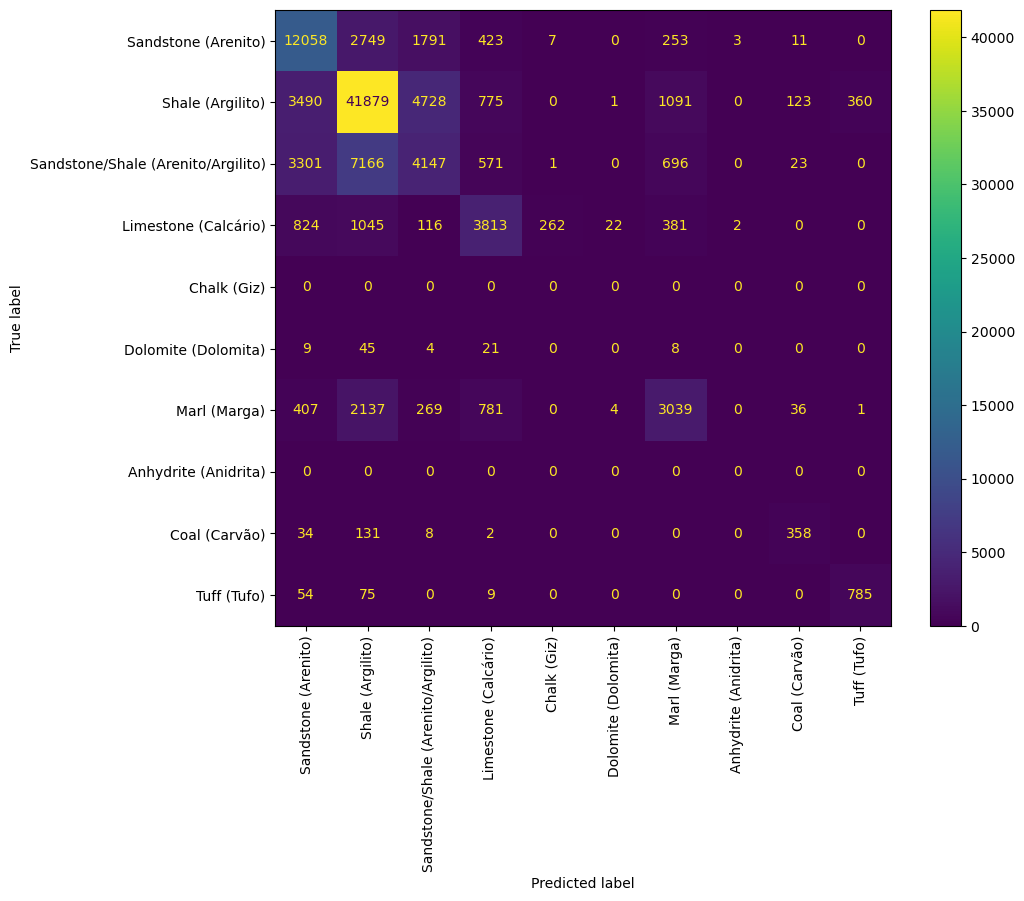

In [73]:
#Plotando a matriz de confusão

fig,axes = plt.subplots(figsize=(10,8))

disp = ConfusionMatrixDisplay(confusion_matrix(blind['FORCE_2020_LITHOFACIES_LITHOLOGY'],y_blind),
                              display_labels=list(dic_blind.values()))

disp.plot(ax=axes)

axes.set_xticklabels(dic_blind.values(),rotation=90)

fig.show()

In [76]:
#usando o map para transform as labels em strings
dataset['knn'] = list(map(litologia_dict.get,knn.predict(scaler.transform(X))))
blind['knn'] = list(map(litologia_dict.get,y_blind))

In [77]:
@interact(well=blind.WELL.unique())
def update_well_plot(well):
    plot_well_logs_comparison(blind, well=well,lithology_col='LITHOLOGY',predicted_col='knn',colors=colors,lithology=lithology,dz=100)

interactive(children=(Dropdown(description='well', options=('15/9-17', '25/2-7', '25/4-5', '31/2-1', '31/2-19 …

In [108]:
mlp = MLPClassifier(alpha=0.001,activation='tanh',hidden_layer_sizes=(30,15,15),max_iter=200)

mlp.fit(scaler.transform(X_train),y_train)

c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(30, 15, 15))

In [109]:
y_mlp_pred = mlp.predict(scaler.transform(X_train))
y_mlp_pred_test = mlp.predict(scaler.transform(X_test))

In [110]:
#Classification report substituindo as labels passadas pelo dicionário
print(classification_report(y_train,y_mlp_pred,
                            target_names=litologia_dict.values()))

                                    precision    recall  f1-score   support

               Sandstone (Arenito)       0.83      0.86      0.84     70857
Sandstone/Shale (Arenito/Argilito)       0.90      0.95      0.93    257980
                  Shale (Argilito)       0.71      0.59      0.65     56086
                      Marl (Marga)       0.80      0.67      0.73     23806
               Dolomite (Dolomita)       0.89      0.84      0.87      5568
              Limestone (Calcário)       0.45      0.08      0.13       593
                       Chalk (Giz)       0.79      0.68      0.73     12790
                   Halite (Halita)       0.89      0.83      0.86       236
              Anhydrite (Anidrita)       1.00      0.07      0.12        15
                       Tuff (Tufo)       0.72      0.59      0.64      2044
                     Coal (Carvão)       0.97      0.92      0.95        76
              Basement (Substrato)       0.79      0.96      0.87      3901

          

In [111]:
#Classification report substituindo as labels passadas pelo dicionário
print(classification_report(y_test,y_mlp_pred_test,
                            target_names=litologia_dict.values()))

                                    precision    recall  f1-score   support

               Sandstone (Arenito)       0.82      0.86      0.84     17632
Sandstone/Shale (Arenito/Argilito)       0.90      0.95      0.93     64447
                  Shale (Argilito)       0.72      0.59      0.65     14111
                      Marl (Marga)       0.80      0.67      0.73      6020
               Dolomite (Dolomita)       0.88      0.84      0.86      1386
              Limestone (Calcário)       0.29      0.03      0.06       143
                       Chalk (Giz)       0.79      0.67      0.72      3168
                   Halite (Halita)       0.90      0.85      0.88        54
              Anhydrite (Anidrita)       0.00      0.00      0.00         5
                       Tuff (Tufo)       0.69      0.57      0.62       531
                     Coal (Carvão)       1.00      0.71      0.83        14
              Basement (Substrato)       0.78      0.95      0.86       978

          

c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
y_blind = mlp.predict(scaler.transform(blind[cols]))
keys_blind = keys_blind = sorted(np.unique(y_blind))
dic_blind = {chave: litologia_dict[chave] for chave in keys_blind}

In [113]:
dic_blind

{30000: 'Sandstone (Arenito)',
 65000: 'Shale (Argilito)',
 65030: 'Sandstone/Shale (Arenito/Argilito)',
 70000: 'Limestone (Calcário)',
 70032: 'Chalk (Giz)',
 74000: 'Dolomite (Dolomita)',
 80000: 'Marl (Marga)',
 86000: 'Anhydrite (Anidrita)',
 90000: 'Coal (Carvão)',
 99000: 'Tuff (Tufo)'}

In [114]:
litologia_dict

{30000: 'Sandstone (Arenito)',
 65030: 'Sandstone/Shale (Arenito/Argilito)',
 65000: 'Shale (Argilito)',
 80000: 'Marl (Marga)',
 74000: 'Dolomite (Dolomita)',
 70000: 'Limestone (Calcário)',
 70032: 'Chalk (Giz)',
 88000: 'Halite (Halita)',
 86000: 'Anhydrite (Anidrita)',
 99000: 'Tuff (Tufo)',
 90000: 'Coal (Carvão)',
 93000: 'Basement (Substrato)'}

In [115]:
#Classification report substituindo as labels passadas pelo dicionário
print(classification_report(blind['FORCE_2020_LITHOFACIES_LITHOLOGY'],y_blind))

              precision    recall  f1-score   support

       30000       0.52      0.78      0.62     17295
       65000       0.78      0.87      0.82     52447
       65030       0.42      0.15      0.22     15905
       70000       0.59      0.43      0.50      6465
       70032       0.00      0.00      0.00         0
       74000       0.00      0.00      0.00        87
       80000       0.45      0.20      0.27      6674
       86000       0.00      0.00      0.00         0
       90000       0.60      0.71      0.65       533
       99000       0.58      0.84      0.69       923

    accuracy                           0.66    100329
   macro avg       0.39      0.40      0.38    100329
weighted avg       0.64      0.66      0.63    100329



c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Acer3\AppData\Local\Temp\ipykernel_14096\3156860936.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


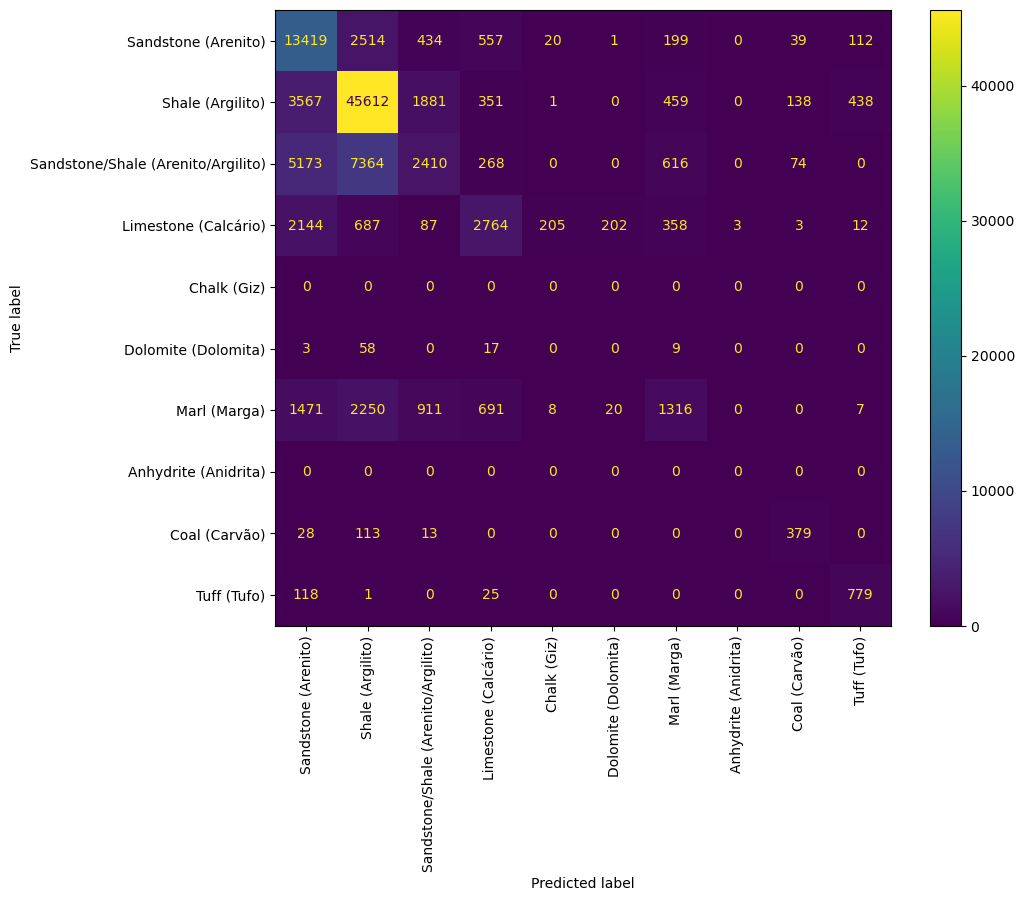

In [116]:
#Plotando a matriz de confusão

fig,axes = plt.subplots(figsize=(10,8))

disp = ConfusionMatrixDisplay(confusion_matrix(blind['FORCE_2020_LITHOFACIES_LITHOLOGY'],y_blind),
                              display_labels=list(dic_blind.values()))

disp.plot(ax=axes)

axes.set_xticklabels(dic_blind.values(),rotation=90)

fig.show()

In [101]:
#usando o map para transform as labels em strings
dataset['mlp'] = list(map(litologia_dict.get,mlp.predict(scaler.transform(X))))
blind['mlp'] = list(map(litologia_dict.get,y_blind))

In [102]:
@interact(well=blind.WELL.unique())
def update_well_plot(well):
    plot_well_logs_comparison(blind, well=well,lithology_col='LITHOLOGY',predicted_col='mlp',colors=colors,lithology=lithology,dz=100)

interactive(children=(Dropdown(description='well', options=('15/9-17', '25/2-7', '25/4-5', '31/2-1', '31/2-19 …